# ST4 MDS : TD 4 Temporal Series Heavy tail 

![CentraleSupelec Logo](https://www.centralesupelec.fr/sites/all/themes/cs_theme/medias/common/images/intro/logo_nouveau.jpg)

## AIMS of the TD : 
* Characterize if a time serie is heavy tailed


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
import powerlaw as pw 
from statsmodels.distributions.empirical_distribution import ECDF
import pandas as pd 
import scipy

In [2]:
__author__ = "Colleville Tanguy"
__copyright__ = "None"
__credits__ = ["None"]
__license__ = "None"
__version__ = "1.0.0"
__maintainer__ = "Colleville Tanguy"
__email__ = "tanguy.colleville@student-cs.fr"
__status__ = "Dev"

In [18]:
def plot_PL(xmin,xmax,ymax,alpha):
    ## plot une power law distribution
    ## y max est le facteur juste pour ajuster ta courbe et la rapporhcer de ta distribtion
    dx = np.linspace(xmin,xmax,5) #also 2 are enough 
    
    y = dx**(-alpha)
    
    return dx,ymax*y/y[0]
    

## Loading the Data set and structure

In [3]:
df=pd.read_csv(r"D:\CS_1A\ST4\Données statistiques en finance\TDs\TD 4\long_series_logret.csv",index_col=0)

In [48]:
df.index = pd.DatetimeIndex(df.index)

In [4]:
print(df.info)

<bound method DataFrame.info of                  NAV
index               
1962-01-03  0.014286
1962-01-04 -0.011891
1962-01-05  0.009524
1962-01-08 -0.014320
1962-01-09 -0.009662
...              ...
2020-03-25  0.058730
2020-03-26  0.065813
2020-03-27 -0.120113
2020-03-30 -0.099241
2020-03-31  0.006083

[14661 rows x 1 columns]>


In [5]:
assets=df.columns

In [19]:
df.isna().sum()

NAV    0
dtype: int64

Nous disposons ici des logreturns de 1 assets et il n'y a pas de NaN values

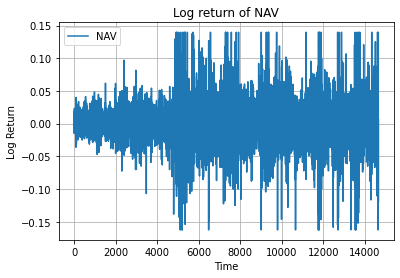

In [7]:
plt.plot(df[assets[0]].values, label=assets[0])
plt.grid()
plt.title(f"Log return of {assets[0]}")
plt.xlabel("Time")
plt.legend()
plt.ylabel("Log Return")
plt.show()

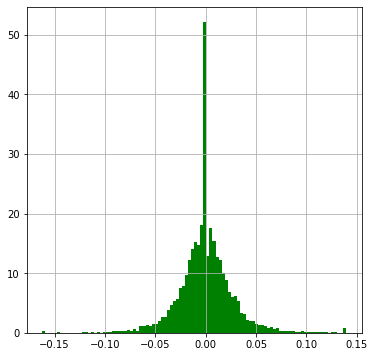

In [10]:
plt.figure(figsize=(6,6))
counts, bins, patches = plt.hist(df['NAV'], bins = 100,density= True, color = 'green')
plt.grid()
plt.show()

 ## Measure the exponent with a power-law and t-distribution fit.

In [23]:
log_ret=df[assets[0]].values
X=np.linspace(np.min(np.abs(log_ret)), np.max(log_ret),1000)
X_max=np.max(log_ret)
ecdf=ECDF(np.abs(log_ret))
Y=1-ecdf(X)

In [12]:
#The powerlaw fit is robust because it try to fit only the tail
ft=pw.Fit(np.abs(log_ret))
alpha=ft.alpha
X_min=ft.xmin

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
d:\CS_1A\ST4\Données statistiques en finance\TDs\FiEnv\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [14]:
# The t-student fit is less because it try to fit the whole distribution
nu,loc,scale=scipy.stats.t.fit(log_ret)#--> is the v param 

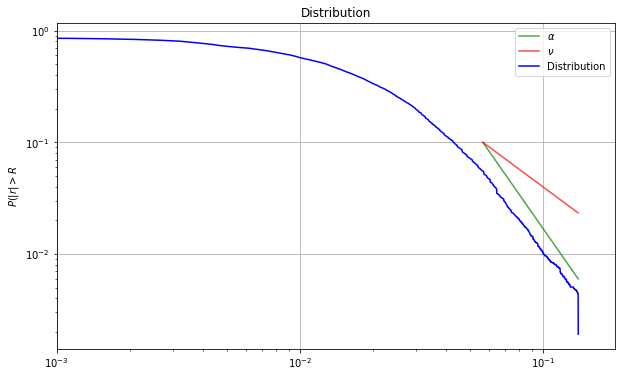

In [42]:
plt.figure(figsize=(10,6))

dx,dy=plot_PL(X_min,X_max,1e-1,alpha-1)
plt.plot(dx,dy,c="green",alpha=0.7,label=r"$\alpha$")

dx,dy=plot_PL(X_min,X_max,1e-1,nu-1)
plt.plot(dx,dy,c="red",alpha=0.7,label=r"$\nu$")

bn = sorted(set(np.abs(log_ret))) # CDF can be binless, it is not useful having a bin lower than the observations 

### mettre de np. partout devant les abs si c'est pas une liste

plt.hist(np.abs(log_ret),bins=bn,density=True,cumulative=-1,histtype='step')# ça montre aussi la distribution si jamais tu galères


plt.plot(X,Y,c='blue',label=r"Distribution")
plt.title("Distribution")
plt.xlabel("")
plt.ylabel(r"$P(|r|>R$")
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.xlim(xmin=1e-3)
plt.grid()
plt.show()

In [71]:
log_ret_2000=df[df.index.year>2000][assets[0]]## parce que lors de l'étude du dataset on voit 2000

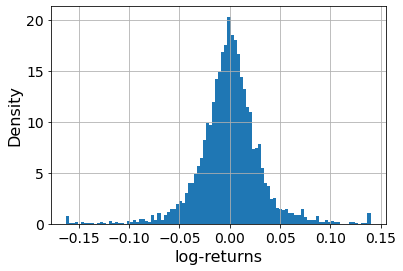

In [72]:
plt.hist(log_ret_2000,bins=100,density=True)
plt.xlabel('log-returns',fontsize=16)
plt.ylabel('Density',fontsize=16)
plt.tick_params(labelsize=14)
plt.grid()
plt.show()

In [ ]:
## on refait la démarche

In [73]:
ft_2000=pw.Fit(abs(log_ret_2000.values))
alpha_2000=ft_2000.alpha
X_min_2000=ft_2000.xmin

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
d:\CS_1A\ST4\Données statistiques en finance\TDs\FiEnv\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [74]:
nu_2000,loc_2000,scale_2000=scipy.stats.t.fit(log_ret_2000)#--> is the v param 

In [75]:
X_2000=np.linspace(np.min(np.abs(log_ret_2000)), np.max(log_ret_2000),1000)
X_max_2000=np.max(log_ret_2000)
ecdf=ECDF(np.abs(log_ret_2000))
Y_2000=1-ecdf(X_2000)

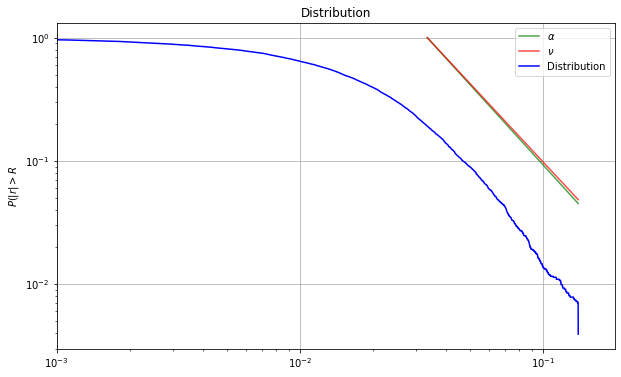

In [82]:
plt.figure(figsize=(10,6))
dx,dy=plot_PL(X_min_2000,X_max_2000,1e0,alpha_2000-1)
plt.plot(dx,dy,c="green",alpha=0.7,label=r"$\alpha$")
dx,dy=plot_PL(X_min_2000,X_max_2000,1e0,nu_2000-1)
plt.plot(dx,dy,c="red",alpha=0.7,label=r"$\nu$")
plt.plot(X_2000,Y_2000,c='blue',label=r"Distribution")
plt.title("Distribution")
plt.xlabel("")
plt.ylabel(r"$P(|r|>R$")
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.xlim(xmin=1e-3)
plt.grid()
plt.show()

In [ ]:
m,M = min(log_ret),max(log_ret)
dx = np.linspace(m,M,1000)
plt.hist(log_ret,bins=100,density=True)
plt.plot(dx,st.t.pdf(dx,v,loc,scale),label='t-expon')
plt.plot(dx,st.t.pdf(dx,ft.alpha,loc,scale),label='pl-exp')

plt.xlabel('log-returns',fontsize=16)
plt.ylabel('Density',fontsize=16)
plt.tick_params(labelsize=14)
plt.legend(loc='best',fontsize=14)

In [ ]:
m,M = min(log_ret),max(log_ret)
dx = np.linspace(m,M,1000)
plt.hist(log_ret,bins=100,density=True)
plt.plot(dx,st.t.pdf(dx,v,loc,scale),label='t-expon')
plt.plot(dx,st.t.pdf(dx,ft.alpha,loc,scale),label='pl-exp')
plt.yscale('log')
plt.xlabel('log-returns',fontsize=16)
plt.ylabel('Density',fontsize=16)
plt.tick_params(labelsize=14)
plt.legend(loc='best',fontsize=14)

In [ ]:
# Both estimators are quite good --> si les deux courbes t_exp et pl-exp se superposent

In [86]:
T = log_ret_2000.shape[0]
dt=1000
A =[]
for t in np.arange(0,T-dt,15):
    tm = log_ret_2000.index[t]+(log_ret_2000.index[t+dt]-log_ret_2000.index[t])/2
    rs = log_ret_2000.iloc[t:t+dt]
    v = scipy.stats.t.fit( rs )[0]
    A.append( (tm,pw.Fit( abs(rs) ).alpha,v)) 

tive values
Calculating best minimal value for power law fit
(Timestamp('2012-03-30 00:00:00'), 3.5652686299485357, 3.8816203236963185)
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
(Timestamp('2012-04-20 00:00:00'), 3.5835093774711875, 3.926744022361234)
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
(Timestamp('2012-05-11 12:00:00'), 3.645187011100827, 3.9608078937615243)
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
(Timestamp('2012-06-02 12:00:00'), 3.594259412580207, 3.883196681666367)
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
(Timestamp('2012-06-23 12:00:00'), 3.6249441060868746, 3.899033034490378)
Values less than or equal to 0 in data. Throwing out 0 or negative values
Cal

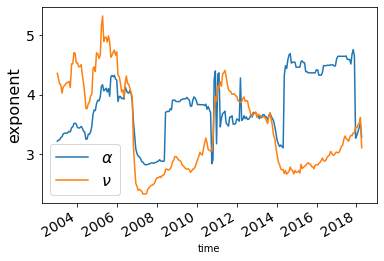

In [87]:
pd.DataFrame(A,columns=['time',r'$α$',r'$\nu$']).set_index('time').plot()
plt.tick_params(labelsize=14)
plt.ylabel('exponent',fontsize=16)
plt.legend(fontsize=16)

In [ ]:
# c'est cho de fitter un exposant